<a href="https://colab.research.google.com/github/Praneeth-18/Classification-Amalgamation-Confusion/blob/main/Classification%2C_Amalgamation%2C_Confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objective

The task is to perform classification to see if carpooling is possible or not for a given ride. The criteria being pickup and dropoff locations of rides are similar within certain range.

We achieve this by performing groupby on pickup_longitude,	pickup_latitude,	dropoff_longitude and	dropoff_latitude.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/uber_pre_clustering.csv')

In [ ]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,0.015140,2015-05-07,19:52:06,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,0.022103,2009-07-17,20:04:56,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0.053109,2009-08-24,21:45:00,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,0.016528,2009-06-26,08:22:21,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0.051031,2014-08-28,17:47:00,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26243 entries, 0 to 26242
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fare_amount         26243 non-null  float64
 1   pickup_longitude    26243 non-null  float64
 2   pickup_latitude     26243 non-null  float64
 3   dropoff_longitude   26243 non-null  float64
 4   dropoff_latitude    26243 non-null  float64
 5   passenger_count     26243 non-null  float64
 6   euclidean_distance  26243 non-null  float64
 7   date                26243 non-null  object 
 8   time                26243 non-null  object 
 9   day_of_week         26243 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


# **Dataset1**

Rounding the pickup and dropoff latitude and longitudes precision to measure the distances in kilometers.

In [ ]:
data['pickup_lat_round'] = data['pickup_latitude'].round(2)
data['pickup_long_round'] = data['pickup_longitude'].round(2)
data['dropoff_lat_round'] = data['dropoff_latitude'].round(2)
data['dropoff_long_round'] = data['dropoff_longitude'].round(2)
grouped=data.groupby(['pickup_lat_round','pickup_long_round','dropoff_lat_round','dropoff_long_round'])

In [ ]:
# ChatGPT
# Filter groups with more than 2 records
filtered_groups = {name: group for name, group in grouped if len(group) > 2}

for name, group in filtered_groups.items():
    print(f"Group: {name}")
    print(group)
    print("\n")

Streaming output truncated to the last 5000 lines.
26074          8.5        -73.970768        40.788312         -73.972858   

       dropoff_latitude  passenger_count  euclidean_distance        date  \
4400          40.762500              1.0            0.025408  2012-07-18   
5645          40.761397              1.0            0.027158  2013-08-26   
8537          40.762656              1.0            0.029872  2011-02-08   
11108         40.757920              5.0            0.029172  2013-03-05   
15346         40.758030              1.0            0.027797  2009-09-01   
15692         40.764040              1.0            0.027986  2014-12-13   
17316         40.760845              2.0            0.033283  2012-01-28   
18512         40.764300              2.0            0.024157  2011-01-13   
19253         40.764032              1.0            0.023292  2013-09-16   
20376         40.764892              1.0            0.026005  2014-11-23   
20457         40.762773             

In [ ]:
# Label elements in a group with more than one count as 'carpool_possible'
data['carpool_possible'] = grouped['pickup_lat_round'].transform(lambda x: len(x) > 1)
data['carpool_possible'].value_counts()

True     23527
False     2716
Name: carpool_possible, dtype: int64

In [ ]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,pickup_lat_round,pickup_long_round,dropoff_lat_round,dropoff_long_round,carpool_possible
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,0.015140,2015-05-07,19:52:06,3,40.74,-74.00,40.72,-74.00,True
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,0.022103,2009-07-17,20:04:56,4,40.73,-73.99,40.75,-73.99,True
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0.053109,2009-08-24,21:45:00,0,40.74,-74.01,40.77,-73.96,True
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,0.016528,2009-06-26,08:22:21,4,40.79,-73.98,40.80,-73.97,True
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0.051031,2014-08-28,17:47:00,3,40.74,-73.93,40.76,-73.97,True


In [ ]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'euclidean_distance', 'day_of_week']
X_data = data[features]
y_data = data['carpool_possible']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((20994, 8), (20994,), (5249, 8), (5249,))

***Running the Muller Loop***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
results = []

for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    training_time = time() - start_time
    results.append((name, score, training_time))

    if score > max_score:
        max_score = score
        max_class = name

results_df = pd.DataFrame(results, columns=['Classifier', 'Score', 'Training Time'])
best_result = f"Best --> Classifier = {max_class}, Score (test, accuracy) = {max_score:.2f}"

results_df, best_result


(          Classifier     Score  Training Time
 0  Nearest Neighbors  0.913888       1.477419
 1         Linear SVM  0.903029       7.700096
 2            RBF SVM  0.935035      17.296108
 3      Decision Tree  0.925700       0.092035
 4      Random Forest  0.924176       0.118727
 5         Neural Net  0.923795       6.910414
 6           AdaBoost  0.930653       1.961177
 7        Naive Bayes  0.900362       0.016097
 8                QDA  0.903410       0.036640,
 'Best --> Classifier = RBF SVM, Score (test, accuracy) = 0.94')

# **Dataset2**

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/synthetic_uber_data_2016.csv')

In [ ]:
data2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,haversine_distance_km,year,month,day,hour,minutes,seconds
0,3.754970,-73.993337,40.704640,-73.967160,40.692462,0.799407,0.028871,2016-10-08,1900-01-01 16:23:30,5,2.589152,2016,10,8,16,23,30
1,10.677653,-73.923804,40.753508,-74.011043,40.713760,1.024726,0.095868,2016-05-14,1900-01-01 12:23:01,5,8.577056,2016,5,14,12,23,1
2,28.195764,-73.958486,40.770873,-73.974856,40.780584,0.391605,0.019034,2016-06-04,1900-01-01 21:14:46,5,1.751027,2016,6,4,21,14,46
3,3.973048,-74.014006,40.765441,-73.991878,40.789847,0.747790,0.032944,2016-11-28,1900-01-01 12:11:34,0,3.291935,2016,11,28,12,11,34
4,18.820961,-74.018694,40.778900,-73.979031,40.734620,-0.066548,0.059446,2016-06-30,1900-01-01 23:16:37,3,5.950097,2016,6,30,23,16,37


In [ ]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,pickup_lat_round,pickup_long_round,dropoff_lat_round,dropoff_long_round,carpool_possible
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,0.015140,2015-05-07,19:52:06,3,40.74,-74.00,40.72,-74.00,True
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,0.022103,2009-07-17,20:04:56,4,40.73,-73.99,40.75,-73.99,True
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0.053109,2009-08-24,21:45:00,0,40.74,-74.01,40.77,-73.96,True
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,0.016528,2009-06-26,08:22:21,4,40.79,-73.98,40.80,-73.97,True
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0.051031,2014-08-28,17:47:00,3,40.74,-73.93,40.76,-73.97,True


In [ ]:
data2.drop(['haversine_distance_km',	'year',	'month', 'day',	'hour',	'minutes', 'seconds'], axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week
0,3.754970,-73.993337,40.704640,-73.967160,40.692462,0.799407,0.028871,2016-10-08,1900-01-01 16:23:30,5
1,10.677653,-73.923804,40.753508,-74.011043,40.713760,1.024726,0.095868,2016-05-14,1900-01-01 12:23:01,5
2,28.195764,-73.958486,40.770873,-73.974856,40.780584,0.391605,0.019034,2016-06-04,1900-01-01 21:14:46,5
3,3.973048,-74.014006,40.765441,-73.991878,40.789847,0.747790,0.032944,2016-11-28,1900-01-01 12:11:34,0
4,18.820961,-74.018694,40.778900,-73.979031,40.734620,-0.066548,0.059446,2016-06-30,1900-01-01 23:16:37,3
...,...,...,...,...,...,...,...,...,...,...
995,7.944962,-73.935617,40.755217,-73.958941,40.789697,2.373378,0.041628,2016-03-09,1900-01-01 19:14:51,2
996,4.253515,-73.948505,40.822370,-74.025233,40.745026,2.426680,0.108947,2016-08-15,1900-01-01 20:27:27,0
997,7.735669,-74.034723,40.752696,-74.030862,40.788690,2.545613,0.036200,2016-02-14,1900-01-01 20:51:05,6
998,8.156047,-73.986227,40.762492,-73.900788,40.743167,0.602135,0.087598,2016-10-09,1900-01-01 18:19:16,6


In [ ]:
data2['pickup_lat_round'] = data2['pickup_latitude'].round(2)
data2['pickup_long_round'] = data2['pickup_longitude'].round(2)
data2['dropoff_lat_round'] = data2['dropoff_latitude'].round(2)
data2['dropoff_long_round'] = data2['dropoff_longitude'].round(2)
grouped=data2.groupby(['pickup_lat_round','pickup_long_round','dropoff_lat_round','dropoff_long_round'])

In [ ]:
# ChatGPT
# Filter groups with more than 2 records
filtered_groups = {name: group for name, group in grouped if len(group) > 2}

for name, group in filtered_groups.items():
    print(f"Group: {name}")
    print(group)
    print("\n")

Group: (40.78, -73.95, 40.76, -73.96)
     fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
85      1.254111        -73.945165        40.783505         -73.962499   
384     9.473268        -73.954242        40.780217         -73.963558   
877    17.849215        -73.954018        40.777363         -73.964898   

     dropoff_latitude  passenger_count  euclidean_distance        date  \
85          40.759869         1.768966            0.029311  2016-08-29   
384         40.762118         2.298715            0.020356  2016-02-25   
877         40.755249         3.055102            0.024646  2016-07-15   

                    time  day_of_week  ...  year  month  day  hour  minutes  \
85   1900-01-01 01:41:30            0  ...  2016      8   29     1       41   
384  1900-01-01 15:36:15            3  ...  2016      2   25    15       36   
877  1900-01-01 03:47:13            4  ...  2016      7   15     3       47   

     seconds  pickup_lat_round  pickup_long_round  

In [ ]:
# Label elements in a group with more than one count as 'carpool_possible'
data2['carpool_possible'] = grouped['pickup_lat_round'].transform(lambda x: len(x) > 1)
data2['carpool_possible'].value_counts()

False    965
True      35
Name: carpool_possible, dtype: int64

In [ ]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'euclidean_distance', 'day_of_week']
X_data = data2[features]
y_data = data2['carpool_possible']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((800, 8), (800,), (200, 8), (200,))

***Running the Muller Loop***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
results = []

for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    training_time = time() - start_time
    results.append((name, score, training_time))

    if score > max_score:
        max_score = score
        max_class = name

results_df = pd.DataFrame(results, columns=['Classifier', 'Score', 'Training Time'])
best_result = f"Best --> Classifier = {max_class}, Score (test, accuracy) = {max_score:.2f}"

results_df, best_result

(          Classifier  Score  Training Time
 0  Nearest Neighbors  0.955       0.069401
 1         Linear SVM  0.960       0.020415
 2            RBF SVM  0.960       0.099291
 3      Decision Tree  0.935       0.013187
 4      Random Forest  0.960       0.039032
 5         Neural Net  0.960       2.003297
 6           AdaBoost  0.960       0.257436
 7        Naive Bayes  0.960       0.003197
 8                QDA  0.950       0.003725,
 'Best --> Classifier = Linear SVM, Score (test, accuracy) = 0.96')

# **Dataset1 + Dataset2**

In [ ]:
ds1_ds2 = pd.concat([data, data2], ignore_index=True)

In [ ]:
ds1_ds2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,...,dropoff_lat_round,dropoff_long_round,carpool_possible,haversine_distance_km,year,month,day,hour,minutes,seconds
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,0.015140,2015-05-07,19:52:06,3,...,40.72,-74.00,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,0.022103,2009-07-17,20:04:56,4,...,40.75,-73.99,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0.053109,2009-08-24,21:45:00,0,...,40.77,-73.96,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,0.016528,2009-06-26,08:22:21,4,...,40.80,-73.97,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0.051031,2014-08-28,17:47:00,3,...,40.76,-73.97,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds1_ds2.drop(['haversine_distance_km',	'year',	'month', 'day',	'hour',	'minutes', 'seconds'], axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,pickup_lat_round,pickup_long_round,dropoff_lat_round,dropoff_long_round,carpool_possible
0,7.500000,-73.999817,40.738354,-73.999512,40.723217,1.000000,0.015140,2015-05-07,19:52:06,3,40.74,-74.00,40.72,-74.00,True
1,7.700000,-73.994355,40.728225,-73.994710,40.750325,1.000000,0.022103,2009-07-17,20:04:56,4,40.73,-73.99,40.75,-73.99,True
2,12.900000,-74.005043,40.740770,-73.962565,40.772647,1.000000,0.053109,2009-08-24,21:45:00,0,40.74,-74.01,40.77,-73.96,True
3,5.300000,-73.976124,40.790844,-73.965316,40.803349,3.000000,0.016528,2009-06-26,08:22:21,4,40.79,-73.98,40.80,-73.97,True
4,16.000000,-73.925023,40.744085,-73.973082,40.761247,5.000000,0.051031,2014-08-28,17:47:00,3,40.74,-73.93,40.76,-73.97,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27238,7.944962,-73.935617,40.755217,-73.958941,40.789697,2.373378,0.041628,2016-03-09,1900-01-01 19:14:51,2,40.76,-73.94,40.79,-73.96,False
27239,4.253515,-73.948505,40.822370,-74.025233,40.745026,2.426680,0.108947,2016-08-15,1900-01-01 20:27:27,0,40.82,-73.95,40.75,-74.03,False
27240,7.735669,-74.034723,40.752696,-74.030862,40.788690,2.545613,0.036200,2016-02-14,1900-01-01 20:51:05,6,40.75,-74.03,40.79,-74.03,False
27241,8.156047,-73.986227,40.762492,-73.900788,40.743167,0.602135,0.087598,2016-10-09,1900-01-01 18:19:16,6,40.76,-73.99,40.74,-73.90,False


In [ ]:
ds1_ds2['pickup_lat_round'] = ds1_ds2['pickup_latitude'].round(2)
ds1_ds2['pickup_long_round'] = ds1_ds2['pickup_longitude'].round(2)
ds1_ds2['dropoff_lat_round'] = ds1_ds2['dropoff_latitude'].round(2)
ds1_ds2['dropoff_long_round'] = ds1_ds2['dropoff_longitude'].round(2)
grouped=ds1_ds2.groupby(['pickup_lat_round','pickup_long_round','dropoff_lat_round','dropoff_long_round'])

In [ ]:
# ChatGPT
# Filter groups with more than 2 records
filtered_groups = {name: group for name, group in grouped if len(group) > 2}

for name, group in filtered_groups.items():
    print(f"Group: {name}")
    print(group)
    print("\n")

Streaming output truncated to the last 5000 lines.
1235     NaN   NaN   NaN      NaN      NaN  
4486     NaN   NaN   NaN      NaN      NaN  
5083     NaN   NaN   NaN      NaN      NaN  
5352     NaN   NaN   NaN      NaN      NaN  
5582     NaN   NaN   NaN      NaN      NaN  
5761     NaN   NaN   NaN      NaN      NaN  
6180     NaN   NaN   NaN      NaN      NaN  
11250    NaN   NaN   NaN      NaN      NaN  
11563    NaN   NaN   NaN      NaN      NaN  
13796    NaN   NaN   NaN      NaN      NaN  
14037    NaN   NaN   NaN      NaN      NaN  
14220    NaN   NaN   NaN      NaN      NaN  
14408    NaN   NaN   NaN      NaN      NaN  
14598    NaN   NaN   NaN      NaN      NaN  
15229    NaN   NaN   NaN      NaN      NaN  
18685    NaN   NaN   NaN      NaN      NaN  
18901    NaN   NaN   NaN      NaN      NaN  
19360    NaN   NaN   NaN      NaN      NaN  
20593    NaN   NaN   NaN      NaN      NaN  
21709    NaN   NaN   NaN      NaN      NaN  
21996    NaN   NaN   NaN      NaN      NaN  
2368

In [ ]:
ds1_ds2['carpool_possible'] = grouped['pickup_lat_round'].transform(lambda x: len(x) > 1)
ds1_ds2['carpool_possible'].value_counts()

True     23772
False     3471
Name: carpool_possible, dtype: int64

In [ ]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'euclidean_distance', 'day_of_week']
X_data = ds1_ds2[features]
y_data = ds1_ds2['carpool_possible']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((21794, 8), (21794,), (5449, 8), (5449,))

***Running the Muller Loop***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
results = []

for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    training_time = time() - start_time
    results.append((name, score, training_time))

    if score > max_score:
        max_score = score
        max_class = name

results_df = pd.DataFrame(results, columns=['Classifier', 'Score', 'Training Time'])
best_result = f"Best --> Classifier = {max_class}, Score (test, accuracy) = {max_score:.2f}"

results_df, best_result

(          Classifier     Score  Training Time
 0  Nearest Neighbors  0.912277       1.152056
 1         Linear SVM  0.880712       9.253058
 2            RBF SVM  0.933382      21.698865
 3      Decision Tree  0.915397       0.128969
 4      Random Forest  0.908240       0.170547
 5         Neural Net  0.912094       6.772809
 6           AdaBoost  0.924940       1.421995
 7        Naive Bayes  0.885117       0.007659
 8                QDA  0.895027       0.012517,
 'Best --> Classifier = RBF SVM, Score (test, accuracy) = 0.93')

# **Dataset3**

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/synthetic_uber_data_2017.csv')

In [ ]:
data3.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,haversine_distance_km,year,month,day,hour,minutes,seconds
0,0.644374,-73.921559,40.759809,-73.962431,40.780003,2.676977,0.045588,2017-08-24,1900-01-01 02:01:34,3,4.109585,2017,8,24,2,1,34
1,21.837635,-73.998805,40.743252,-73.986864,40.716512,1.507802,0.029285,2017-03-10,1900-01-01 22:15:17,4,3.138967,2017,3,10,22,15,17
2,10.415688,-74.016647,40.818905,-73.986367,40.757258,-0.575934,0.068681,2017-03-04,1900-01-01 17:12:03,5,7.313422,2017,3,4,17,12,3
3,9.563742,-73.941280,40.769121,-74.054762,40.745237,1.145715,0.115969,2017-09-02,1900-01-01 02:25:52,5,9.920525,2017,9,2,2,25,52
4,8.389344,-73.995244,40.707357,-73.938367,40.754477,2.864139,0.073860,2017-06-18,1900-01-01 14:00:11,6,7.100758,2017,6,18,14,0,11


In [ ]:
data3.drop(['haversine_distance_km',	'year',	'month', 'day',	'hour',	'minutes', 'seconds'], axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week
0,0.644374,-73.921559,40.759809,-73.962431,40.780003,2.676977,0.045588,2017-08-24,1900-01-01 02:01:34,3
1,21.837635,-73.998805,40.743252,-73.986864,40.716512,1.507802,0.029285,2017-03-10,1900-01-01 22:15:17,4
2,10.415688,-74.016647,40.818905,-73.986367,40.757258,-0.575934,0.068681,2017-03-04,1900-01-01 17:12:03,5
3,9.563742,-73.941280,40.769121,-74.054762,40.745237,1.145715,0.115969,2017-09-02,1900-01-01 02:25:52,5
4,8.389344,-73.995244,40.707357,-73.938367,40.754477,2.864139,0.073860,2017-06-18,1900-01-01 14:00:11,6
...,...,...,...,...,...,...,...,...,...,...
995,7.101886,-74.001495,40.785138,-74.025114,40.744429,1.849579,0.047064,2017-08-09,1900-01-01 05:50:20,2
996,17.203912,-74.022652,40.769078,-74.017259,40.732334,1.502728,0.037138,2017-09-13,1900-01-01 18:55:38,2
997,4.709598,-74.008868,40.750842,-74.011823,40.719082,0.222716,0.031898,2017-03-05,1900-01-01 00:01:16,6
998,7.867229,-73.994786,40.722321,-73.995525,40.793932,1.847580,0.071615,2017-05-03,1900-01-01 15:16:30,2


In [ ]:
data3['pickup_lat_round'] = data3['pickup_latitude'].round(2)
data3['pickup_long_round'] = data3['pickup_longitude'].round(2)
data3['dropoff_lat_round'] = data3['dropoff_latitude'].round(2)
data3['dropoff_long_round'] = data3['dropoff_longitude'].round(2)
grouped=data3.groupby(['pickup_lat_round','pickup_long_round','dropoff_lat_round','dropoff_long_round'])

In [ ]:
# ChatGPT
# Filter groups with more than 2 records
filtered_groups = {name: group for name, group in grouped if len(group) > 2}

for name, group in filtered_groups.items():
    print(f"Group: {name}")
    print(group)
    print("\n")

In [ ]:
# Label elements in a group with more than one count as 'carpool_possible'
data3['carpool_possible'] = grouped['pickup_lat_round'].transform(lambda x: len(x) > 1)
data3['carpool_possible'].value_counts()

False    972
True      28
Name: carpool_possible, dtype: int64

# **Dataset1 + Dataset2 + Dataset3**

In [ ]:
ds1_ds2_ds3 = pd.concat([data, data2, data3], ignore_index=True)

In [ ]:
ds1_ds2_ds3.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,...,dropoff_lat_round,dropoff_long_round,carpool_possible,haversine_distance_km,year,month,day,hour,minutes,seconds
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,0.015140,2015-05-07,19:52:06,3,...,40.72,-74.00,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,0.022103,2009-07-17,20:04:56,4,...,40.75,-73.99,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0.053109,2009-08-24,21:45:00,0,...,40.77,-73.96,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,0.016528,2009-06-26,08:22:21,4,...,40.80,-73.97,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0.051031,2014-08-28,17:47:00,3,...,40.76,-73.97,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds1_ds2_ds3.drop(['haversine_distance_km',	'year',	'month', 'day',	'hour',	'minutes', 'seconds'], axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,date,time,day_of_week,pickup_lat_round,pickup_long_round,dropoff_lat_round,dropoff_long_round,carpool_possible
0,7.500000,-73.999817,40.738354,-73.999512,40.723217,1.000000,0.015140,2015-05-07,19:52:06,3,40.74,-74.00,40.72,-74.00,True
1,7.700000,-73.994355,40.728225,-73.994710,40.750325,1.000000,0.022103,2009-07-17,20:04:56,4,40.73,-73.99,40.75,-73.99,True
2,12.900000,-74.005043,40.740770,-73.962565,40.772647,1.000000,0.053109,2009-08-24,21:45:00,0,40.74,-74.01,40.77,-73.96,True
3,5.300000,-73.976124,40.790844,-73.965316,40.803349,3.000000,0.016528,2009-06-26,08:22:21,4,40.79,-73.98,40.80,-73.97,True
4,16.000000,-73.925023,40.744085,-73.973082,40.761247,5.000000,0.051031,2014-08-28,17:47:00,3,40.74,-73.93,40.76,-73.97,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28238,7.101886,-74.001495,40.785138,-74.025114,40.744429,1.849579,0.047064,2017-08-09,1900-01-01 05:50:20,2,40.79,-74.00,40.74,-74.03,False
28239,17.203912,-74.022652,40.769078,-74.017259,40.732334,1.502728,0.037138,2017-09-13,1900-01-01 18:55:38,2,40.77,-74.02,40.73,-74.02,False
28240,4.709598,-74.008868,40.750842,-74.011823,40.719082,0.222716,0.031898,2017-03-05,1900-01-01 00:01:16,6,40.75,-74.01,40.72,-74.01,False
28241,7.867229,-73.994786,40.722321,-73.995525,40.793932,1.847580,0.071615,2017-05-03,1900-01-01 15:16:30,2,40.72,-73.99,40.79,-74.00,False


In [ ]:
ds1_ds2_ds3['pickup_lat_round'] = ds1_ds2_ds3['pickup_latitude'].round(2)
ds1_ds2_ds3['pickup_long_round'] = ds1_ds2_ds3['pickup_longitude'].round(2)
ds1_ds2_ds3['dropoff_lat_round'] = ds1_ds2_ds3['dropoff_latitude'].round(2)
ds1_ds2_ds3['dropoff_long_round'] = ds1_ds2_ds3['dropoff_longitude'].round(2)
grouped=ds1_ds2_ds3.groupby(['pickup_lat_round','pickup_long_round','dropoff_lat_round','dropoff_long_round'])

In [ ]:
# Filter groups with more than 2 records
filtered_groups = {name: group for name, group in grouped if len(group) > 2}

# Print the filtered groups
for name, group in filtered_groups.items():
    print(f"Group: {name}")
    print(group)
    print("\n")

Streaming output truncated to the last 5000 lines.
[16 rows x 22 columns]


Group: (40.79, -73.97, 40.8, -73.94)
       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
4856           7.7        -73.972117        40.794060         -73.944445   
18101         10.0        -73.970582        40.794077         -73.940018   
21198         14.9        -73.972412        40.791095         -73.941920   

       dropoff_latitude  passenger_count  euclidean_distance        date  \
4856          40.800650              2.0            0.028446  2012-01-06   
18101         40.800857              1.0            0.031307  2013-02-08   
21198         40.798737              3.0            0.031435  2010-05-09   

           time  day_of_week  ...  dropoff_lat_round  dropoff_long_round  \
4856   01:47:00            4  ...               40.8              -73.94   
18101  00:03:00            4  ...               40.8              -73.94   
21198  17:40:00            6  ...               4

In [ ]:
ds1_ds2_ds3['carpool_possible'] = grouped['pickup_lat_round'].transform(lambda x: len(x) > 1)
ds1_ds2_ds3['carpool_possible'].value_counts()

True     24062
False     4181
Name: carpool_possible, dtype: int64

In [ ]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'euclidean_distance', 'day_of_week']
X_data = ds1_ds2_ds3[features]
y_data = ds1_ds2_ds3['carpool_possible']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((22594, 8), (22594,), (5649, 8), (5649,))

***Running the Muller Loop***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
results = []

for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    training_time = time() - start_time
    results.append((name, score, training_time))

    if score > max_score:
        max_score = score
        max_class = name

results_df = pd.DataFrame(results, columns=['Classifier', 'Score', 'Training Time'])
best_result = f"Best --> Classifier = {max_class}, Score (test, accuracy) = {max_score:.2f}"

results_df, best_result

(          Classifier     Score  Training Time
 0  Nearest Neighbors  0.901753       0.966472
 1         Linear SVM  0.864932      10.447367
 2            RBF SVM  0.924588      26.774697
 3      Decision Tree  0.898566       0.098250
 4      Random Forest  0.894495       0.133004
 5         Neural Net  0.903523      10.262164
 6           AdaBoost  0.912197       1.486359
 7        Naive Bayes  0.871482       0.011244
 8                QDA  0.884935       0.016973,
 'Best --> Classifier = RBF SVM, Score (test, accuracy) = 0.92')

# **Conclusion**

***Accuracy Trend***




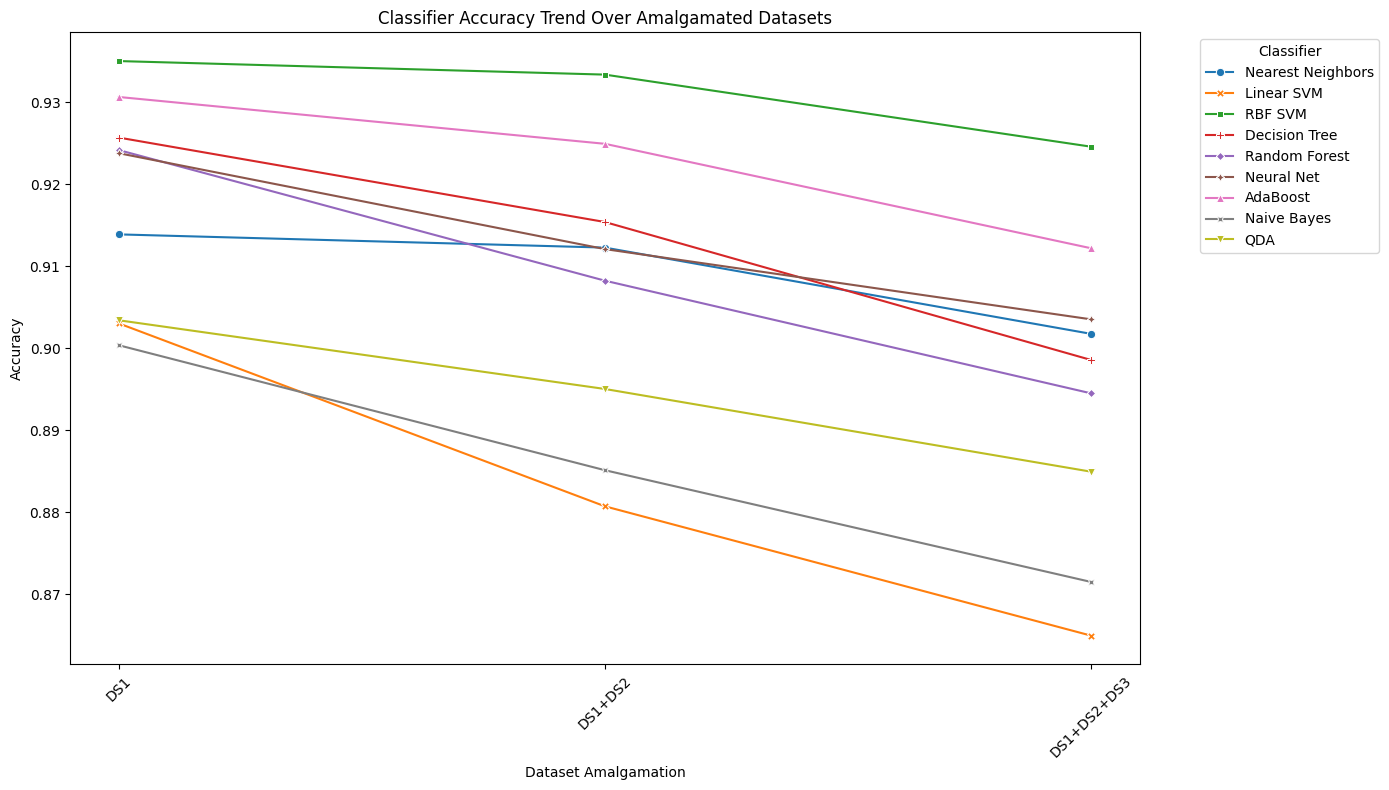

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_plt = {
    'Classifier': ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA'] * 3,
    'Accuracy': [0.913888, 0.903029, 0.935035, 0.925700, 0.924176, 0.923795, 0.930653, 0.900362, 0.903410,
                 0.912277, 0.880712, 0.933382, 0.915397, 0.908240, 0.912094, 0.924940, 0.885117, 0.895027,
                 0.901753, 0.864932, 0.924588, 0.898566, 0.894495, 0.903523, 0.912197, 0.871482, 0.884935],
    'Dataset': ['DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1',
                'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2',
                'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3']
}

results_df = pd.DataFrame(data_plt)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Dataset', y='Accuracy', hue='Classifier', style='Classifier', markers=True, data=results_df, dashes=False)
plt.title('Classifier Accuracy Trend Over Amalgamated Datasets')
plt.xlabel('Dataset Amalgamation')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This plot will illustrate the trend of accuracy for each classifier across the different stages of dataset amalgamation, highlighting the slight decrease.

> *   Results indicate a slight decrease in performance (in terms of accuracy) with each amalgamation rather than an enhancement.
*   For all classifiers, there was a slight decrease in accuracy from Dataset 1 to Dataset 1+2 and then to Dataset 1+2+3.
*   The RBF SVM classifier consistently showed the highest accuracy across all datasets, despite a slight decline in performance.



***Training Time Trend***

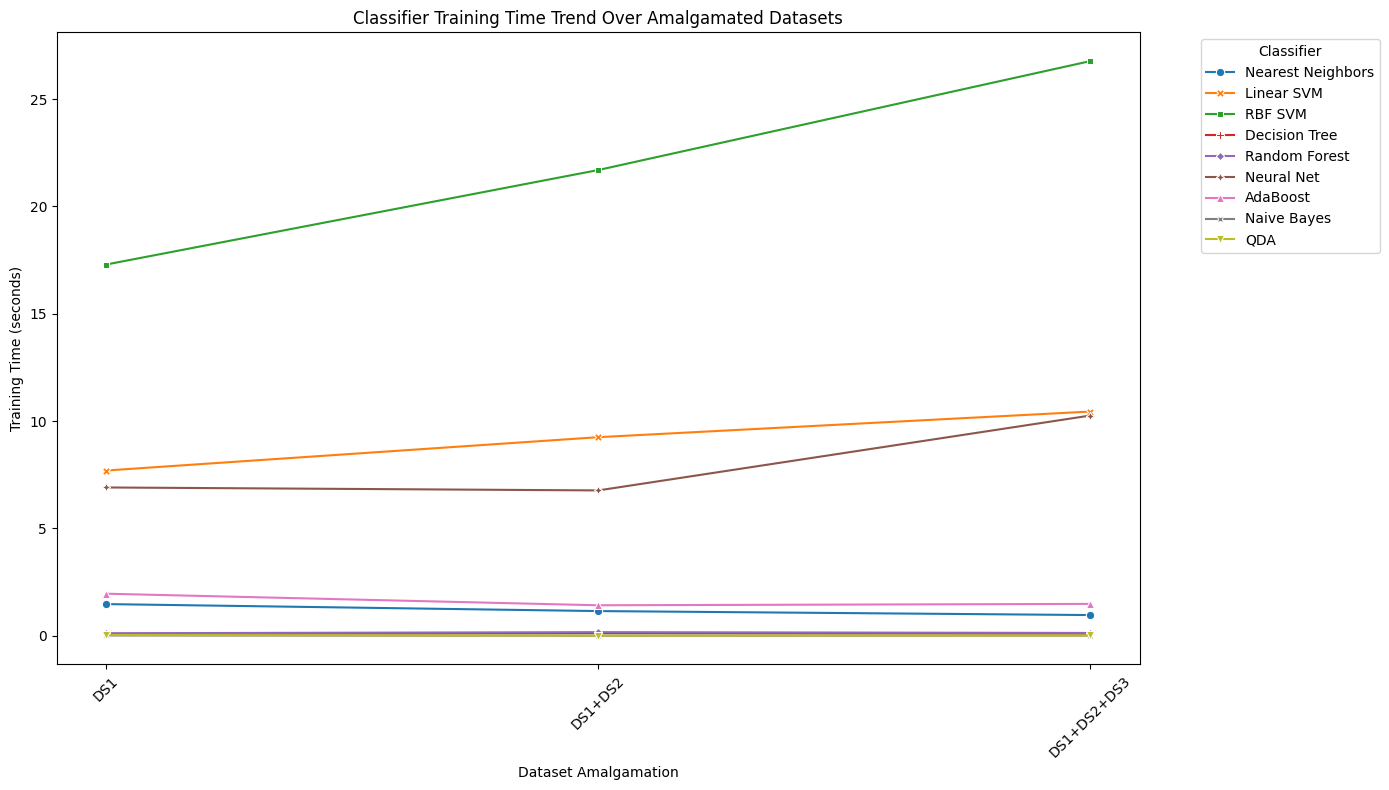

In [ ]:
data_plt2 = {
    'Classifier': ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA'] * 3,
    'Training Time': [1.477419, 7.700096, 17.296108, 0.092035, 0.118727, 6.910414, 1.961177, 0.016097, 0.036640,
                      1.152056, 9.253058, 21.698865, 0.128969, 0.170547, 6.772809, 1.421995, 0.007659, 0.012517,
                      0.966472, 10.447367, 26.774697, 0.098250, 0.133004, 10.262164, 1.486359, 0.011244, 0.016973],
    'Dataset': ['DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1', 'DS1',
                'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2', 'DS1+DS2',
                'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3', 'DS1+DS2+DS3']
}

results_df = pd.DataFrame(data_plt2)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Dataset', y='Training Time', hue='Classifier', style='Classifier', markers=True, data=results_df, dashes=False)
plt.title('Classifier Training Time Trend Over Amalgamated Datasets')
plt.xlabel('Dataset Amalgamation')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This visualization will help highlight how the computational cost increases with the addition of more data.

> *   You can observe how the training time increases for most classifiers as more data is added.
* Training time generally increased with each amalgamation, especially noticeable for RBF SVM.
* Some classifiers show a relatively stable training time despite the increased data volume, indicating their efficiency in handling larger datasets.






In [ ]:
import pandas as pd

data_for_plotting_table = {
    'Classifier': ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA'],
    'Accuracy (DS1)': [0.913888, 0.903029, 0.935035, 0.925700, 0.924176, 0.923795, 0.930653, 0.900362, 0.903410],
    'Training Time (DS1)': [1.477419, 7.700096, 17.296108, 0.092035, 0.118727, 6.910414, 1.961177, 0.016097, 0.036640],
    'Accuracy (DS1+DS2)': [0.912277, 0.880712, 0.933382, 0.915397, 0.908240, 0.912094, 0.924940, 0.885117, 0.895027],
    'Training Time (DS1+DS2)': [1.152056, 9.253058, 21.698865, 0.128969, 0.170547, 6.772809, 1.421995, 0.007659, 0.012517],
    'Accuracy (DS1+DS2+DS3)': [0.901753, 0.864932, 0.924588, 0.898566, 0.894495, 0.903523, 0.912197, 0.871482, 0.884935],
    'Training Time (DS1+DS2+DS3)': [0.966472, 10.447367, 26.774697, 0.098250, 0.133004, 10.262164, 1.486359, 0.011244, 0.016973]
}

results_df = pd.DataFrame(data)

results_df

,Classifier,Accuracy,Dataset
0,Nearest Neighbors,0.913888,DS1
1,Linear SVM,0.903029,DS1
2,RBF SVM,0.935035,DS1
3,Decision Tree,0.925700,DS1
4,Random Forest,0.924176,DS1
5,Neural Net,0.923795,DS1
6,AdaBoost,0.930653,DS1
7,Naive Bayes,0.900362,DS1
8,QDA,0.903410,DS1
9,Nearest Neighbors,0.912277,DS1+DS2


In [ ]:
import pandas as pd

data = {
    'Classifier': ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA'],
    'Accuracy (DS1)': [0.913888, 0.903029, 0.935035, 0.925700, 0.924176, 0.923795, 0.930653, 0.900362, 0.903410],
    'Training Time (DS1)': [1.477419, 7.700096, 17.296108, 0.092035, 0.118727, 6.910414, 1.961177, 0.016097, 0.036640],
    'Accuracy (DS1+DS2)': [0.912277, 0.880712, 0.933382, 0.915397, 0.908240, 0.912094, 0.924940, 0.885117, 0.895027],
    'Training Time (DS1+DS2)': [1.152056, 9.253058, 21.698865, 0.128969, 0.170547, 6.772809, 1.421995, 0.007659, 0.012517],
    'Accuracy (DS1+DS2+DS3)': [0.901753, 0.864932, 0.924588, 0.898566, 0.894495, 0.903523, 0.912197, 0.871482, 0.884935],
    'Training Time (DS1+DS2+DS3)': [0.966472, 10.447367, 26.774697, 0.098250, 0.133004, 10.262164, 1.486359, 0.011244, 0.016973]
}

results_df = pd.DataFrame(data)

sorted_df = results_df.sort_values(by='Accuracy (DS1+DS2+DS3)', ascending=False)

print(sorted_df)

          Classifier  Accuracy (DS1)  Training Time (DS1)  Accuracy (DS1+DS2)  \
2            RBF SVM        0.935035            17.296108            0.933382   
6           AdaBoost        0.930653             1.961177            0.924940   
5         Neural Net        0.923795             6.910414            0.912094   
0  Nearest Neighbors        0.913888             1.477419            0.912277   
3      Decision Tree        0.925700             0.092035            0.915397   
4      Random Forest        0.924176             0.118727            0.908240   
8                QDA        0.903410             0.036640            0.895027   
7        Naive Bayes        0.900362             0.016097            0.885117   
1         Linear SVM        0.903029             7.700096            0.880712   

   Training Time (DS1+DS2)  Accuracy (DS1+DS2+DS3)  \
2                21.698865                0.924588   
6                 1.421995                0.912197   
5                 6.772809 

The RBF SVM consistently emerged as the best-performing model across all the amalgamations of the datasets. Despite a slight decrease in accuracy with each  dataset being added, it maintained the highest accuracy.